# [Atividade Computacional 5](http://mtm.ufsc.br/~douglas/2025.1/MTM410024_MTM3523/Atividade5.pdf)

In [16]:
using LinearAlgebra
using Plots
using Random

In [17]:
using Pkg
Pkg.add("LaTeXStrings")
using LaTeXStrings # Quero usar labels em LaTeX nas imagens

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [b964fa9f] + LaTeXStrings v1.4.0
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


## Criando $X$

In [18]:
n = 100
X = rand(2,n)

2×100 Matrix{Float64}:
 0.606043  0.224526  0.600153   0.863219   …  0.549763  0.20732   0.0505149
 0.230488  0.231747  0.0777356  0.0524831     0.945679  0.915843  0.44454

In [19]:
# Um embrulhe pra não ter que ficar repetindo X[1,:],X[2,:]
plotar(X; kwargs...) = scatter(X[1,:],X[2,:]; kwargs...)
plotar!(X; kwargs...) = scatter!(X[1,:],X[2,:]; kwargs...);

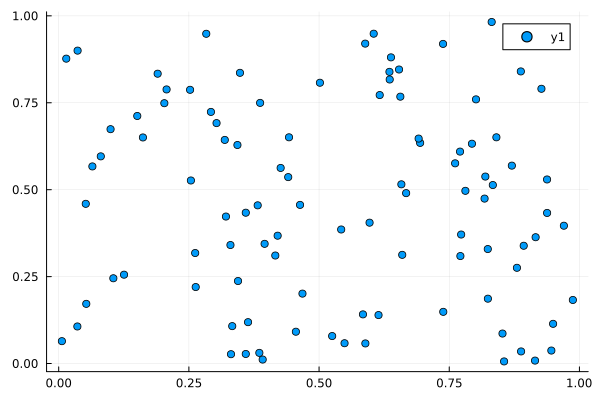

In [4]:
plotar(X)

## Calculando $G$
Calculando a matriz de distâncias $D$.

In [20]:
function matdis(X)
  d, n = size(X) # X é uma matriz cujas colunas são pontos d-dimensionais
  # Vamos usar a matrix compreension de julia:
  # definimos a fórmula para D_ij = norm(X[:,i]-X[:,j])^2
  # e fazemos i e j variarem de 1 a n
  return [norm(X[:,i]-X[:,j])^2 for i=1:n, j=1:n]
end
D = matdis(X);

Calculando a matriz $G = -\frac{1}{2}JDJ$, e forçando simetria fazendo $G = \frac{1}{2}({G+G^\top})$.

In [21]:
J = I - ones(n,n)/n;
G = -(J*D*J)/2;
# simetrizando G
G = (G+G')/2;

## Calculando $Y$
Calculando autovalores e autovetores de G.

In [22]:
Λ, Q = eigen(G, sortby=-); # Ordem decrescente dos autovalores

Vamos agora para uma análise dos autovalores.

1. Limparemos a sujeira numérica: tornaremos zero os valores próximos de zero.
2. Vamos verificar se sobram algum valor negativo
3. Se não sobrarem valores negativos, vamos calcular $r$, o número de autovalores positivos.

In [23]:
function limpasujeira(x, tol=1e-12)
  # retorna 0 se x for sujeira |x|< ϵ, e x caso não seja sujeira
  if abs(x) < tol
    return 0
  else
    return x
  end
end

limpasujeira (generic function with 2 methods)

In [24]:
# Vamos limpar a sujeira de Λ
Λ0 = limpasujeira.(Λ);

In [25]:
Λminus = Λ0 .< 0 # 1 onde a entrada for negativa, 0 caso contrário
Λplus = Λ0 .> 0; # 1 onde a entrada for positiva, 0 caso contrário

In [26]:
sum(Λminus) == 0 # caso tivesse alguém negativo, teríamos problema

true

In [27]:
r = sum(Λplus) # r é a quantidade de autovalores positivos de G

2

Cálculo de $Y=\sqrt{\Lambda_r}Q_r^\top$.

In [28]:
Λr = Diagonal(sqrt.(Λ0[1:r]))
Qr = Q[:,1:r];
Y = Λr*Qr'

2×100 Matrix{Float64}:
 0.081304  0.402679   0.168172  …  -0.254627   0.0504353   0.435482
 0.226411  0.0208035  0.352196     -0.407478  -0.565888   -0.252115

## Comparando $X$ e $Y$

Centralizando $X$ e $Y$ ao redor da origem, multiplicando por $J$. Vamos plotar o gráfico para ver como estão os dados.

In [29]:
Xc = X*J
Yc = Y*J;

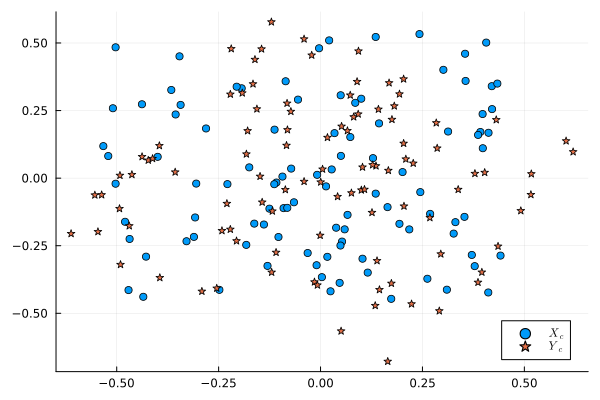

In [30]:
plotar(Xc; label=L"X_c")
plotar!(Yc; label=L"Y_c", mark=:star)

## Problema de Procrustes

Para não ficar com confusão com $U$ do problema e $U$ da SVD, vamos renomear a $U$ do problema como  ${Q}$. Precisamos encontrar uma $Q$ que resolva o problema

$$
\begin{align}
 \min  & \quad \left\|QY_c-X_c\right\|_F^2 \\
\text{s.a. } & \quad {Q}\in\mathbb{R}^{2\times 2}\\
 & \quad {Q}{Q}^\top = {Q}^\top Q = I
\end{align}
$$

Usando que $\|A\|_F^2 = \text{tr}(A A^\top)$, expandimos nossa função objetivo da seguinte maneira:
$$
 \left\|QY_c-X_c\right\|_F^2 = \|Y_c\|_F^2 + \|X_C\|_F^2-2\text{tr}(QY_cX_c^\top),
$$
no qual utilizamos a linearidade do traço, e que a norma frobenius é invariante por transformações ortogonais.


Logo, minimizar nossa função objetivo é equivalente a maximizar $\text{tr}(QY_cX_c^\top)$.

Calculando a SVD de $$Y_cX_c^\top = U\Sigma V^\top$$ e utilizando a propriedade cíclica do traço, temos que maximizar

$$\text{tr}(Q U\Sigma V^\top) = \text{tr}(\Sigma V^\top Q U)$$

A solução para esse problema é dada por

$${Q}=VU^\top$$

pois nesse caso, $ \text{tr}(\Sigma V^\top Q U) = \text{tr}(\Sigma V^\top VU^\top U) = \text{tr}(\Sigma).$



In [31]:
U, Σ, V = svd(Yc*Xc');
Z = (V*U')*Yc;

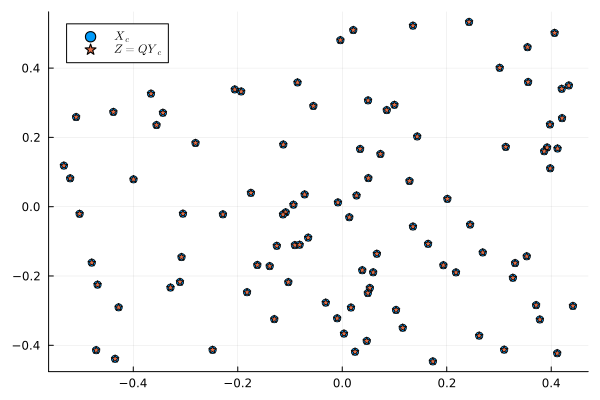

In [32]:
plotar(Xc; label=L"X_c")
plotar!(Z; label=L"Z=QY_c", mark=:star)

Visualmente temos um match perfeito, vamos conferir a norma da diferença.

In [33]:
norm(Z-Xc)

3.152063234059821e-15

Veja que a norma da diferença é um zero a menos de uma sujeirinha.